In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [2]:
repouso = pd.read_csv('samples/repouso.csv')
repouso_mongo = pd.read_csv('samples/repouso_mongo.csv')
repouso_postgres = pd.read_csv('samples/repouso_postgres.csv')

mongo = pd.read_csv('samples/mongo.csv')
tempos_mongo = pd.read_csv('samples/tempos_mongo.csv', names=['start', 'finish'])

postgres = [pd.read_csv(f'samples/postgres{i}.csv') for i in range(1, 6)]
tempos_postgres = [pd.read_csv(f'samples/tempos_postgres{i}.csv', names=['start', 'finish']) for i in range(1, 6)]

In [3]:
duracao_mongo = tempos_mongo['finish'] - tempos_mongo['start']
#duracao_mongo


[          start        finish
0  1.668459e+09  1.668459e+09
1  1.668459e+09  1.668459e+09
2  1.668459e+09  1.668459e+09
3  1.668459e+09  1.668459e+09
4  1.668459e+09  1.668459e+09
5  1.668459e+09  1.668459e+09,           start        finish
0  1.668460e+09  1.668460e+09
1  1.668460e+09  1.668460e+09
2  1.668460e+09  1.668460e+09
3  1.668460e+09  1.668460e+09
4  1.668460e+09  1.668460e+09
5  1.668460e+09  1.668460e+09,           start        finish
0  1.668460e+09  1.668460e+09
1  1.668460e+09  1.668460e+09
2  1.668460e+09  1.668460e+09
3  1.668460e+09  1.668460e+09
4  1.668460e+09  1.668460e+09
5  1.668460e+09  1.668460e+09,           start        finish
0  1.668460e+09  1.668460e+09
1  1.668460e+09  1.668460e+09
2  1.668460e+09  1.668460e+09
3  1.668460e+09  1.668460e+09
4  1.668460e+09  1.668460e+09
5  1.668460e+09  1.668460e+09,           start        finish
0  1.668460e+09  1.668460e+09
1  1.668460e+09  1.668460e+09
2  1.668460e+09  1.668460e+09
3  1.668460e+09  1.668460e+09
4  1.

In [4]:
duracoes_postgres = [t['finish'] - t['start'] for t in tempos_postgres]
#duracoes_postgres
duracoes_postgres

[0    0.066875
 1    2.033322
 2    0.026241
 3    0.386241
 4    1.244010
 5    1.141834
 dtype: float64,
 0    0.068489
 1    1.682390
 2    0.018507
 3    0.401054
 4    0.742990
 5    0.737698
 dtype: float64,
 0     1.244374
 1    14.410765
 2     0.026128
 3     0.393721
 4     1.271731
 5     1.141871
 dtype: float64,
 0    0.057966
 1    1.738352
 2    0.026210
 3    0.405133
 4    0.744510
 5    0.737411
 dtype: float64,
 0    0.068955
 1    2.100980
 2    0.021453
 3    0.386882
 4    1.257642
 5    1.140339
 dtype: float64]

In [5]:
experimentos_mongo = tempos_mongo.apply(
    lambda row: mongo[(mongo['timestamp'] > row['start']) & (mongo['timestamp'] <= row['finish'] + 0.6)][:].reset_index(drop=True),
    axis=1
).tolist()
experimentos_mongo[3].head()

,timestamp,disk_rb,disk_rc,disk_rt,disk_wb,disk_wc,disk_wt,ram,usage
0,1.668378e+09,1.908439e+07,276.138944,157.996892,0.000000e+00,0.000000,0.000000,3220602880,21.0
1,1.668378e+09,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,3231182848,25.6
2,1.668378e+09,0.000000e+00,0.000000,0.000000,7.111413e+07,168.225181,192.970096,3294429184,28.4
3,1.668378e+09,1.310677e+06,34.417424,44.174386,2.351022e+08,4938.824382,999.166711,3295543296,34.1
4,1.668378e+09,1.228268e+06,68.909246,108.463391,3.044560e+08,3147.273405,958.980998,3295293440,30.4


In [6]:
experimentos_postgres = [
    t.apply(
    lambda row: p[(p['timestamp'] > row['start'] ) & (p['timestamp'] <= row['finish'] + 0.6)][:].reset_index(drop=True),
    axis=1
    )
    for t, p in zip(tempos_postgres, postgres)
]

In [7]:
uso_da_maquina = [{
    coluna: pd.DataFrame(
    {
        'repouso': repouso[coluna],
        'mongo em repouso': repouso_mongo[coluna],
        'mongo': consulta_mongo[coluna],
        'postgres em repouso': repouso_postgres[coluna],
        'postgres': experimentos_postgres[0][i][coluna],
        'postgres name btree': experimentos_postgres[1][i][coluna],
        'postgres ratings btree': experimentos_postgres[2][i][coluna],
        'postgres name hashtable': experimentos_postgres[3][i][coluna],
        'postgres ratings hashtable': experimentos_postgres[4][i][coluna]
    }
    )
    for coluna in consulta_mongo.columns

}
    for i, consulta_mongo in enumerate(experimentos_mongo)
    
]



In [8]:
uso_da_maquina[3]['disk_rb'].max()

repouso                       1.515400e+04
mongo em repouso              8.047833e+04
mongo                         5.970292e+07
postgres em repouso           4.849166e+06
postgres                      0.000000e+00
postgres name btree           4.420810e+05
postgres ratings btree        0.000000e+00
postgres name hashtable       4.451105e+05
postgres ratings hashtable    0.000000e+00
dtype: float64

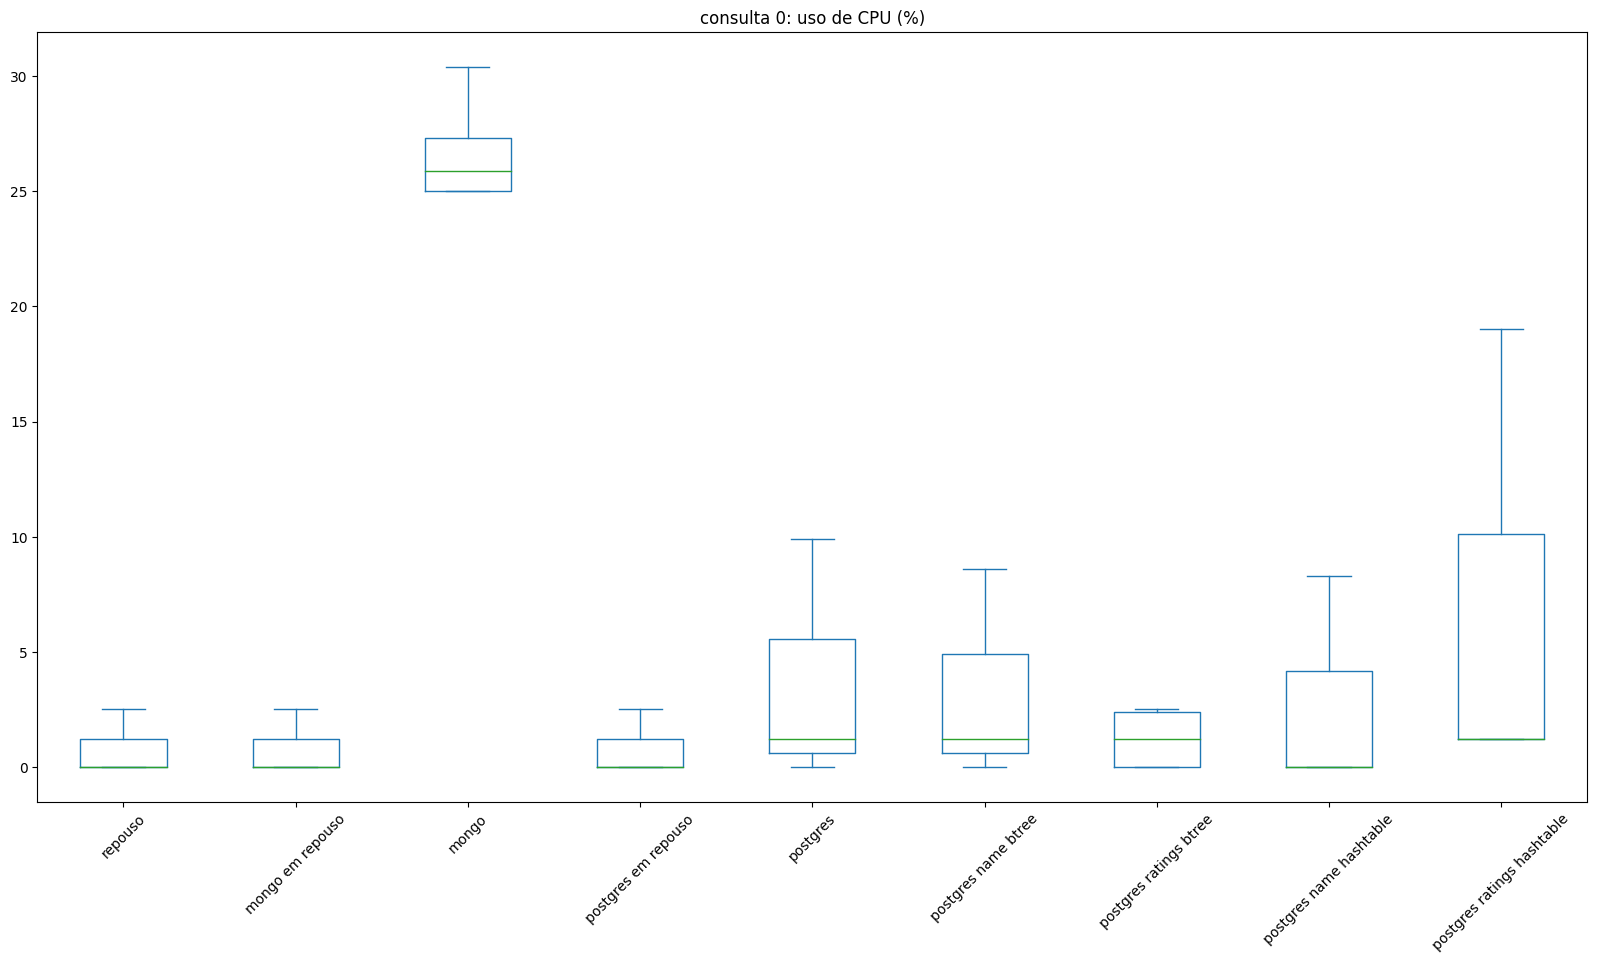

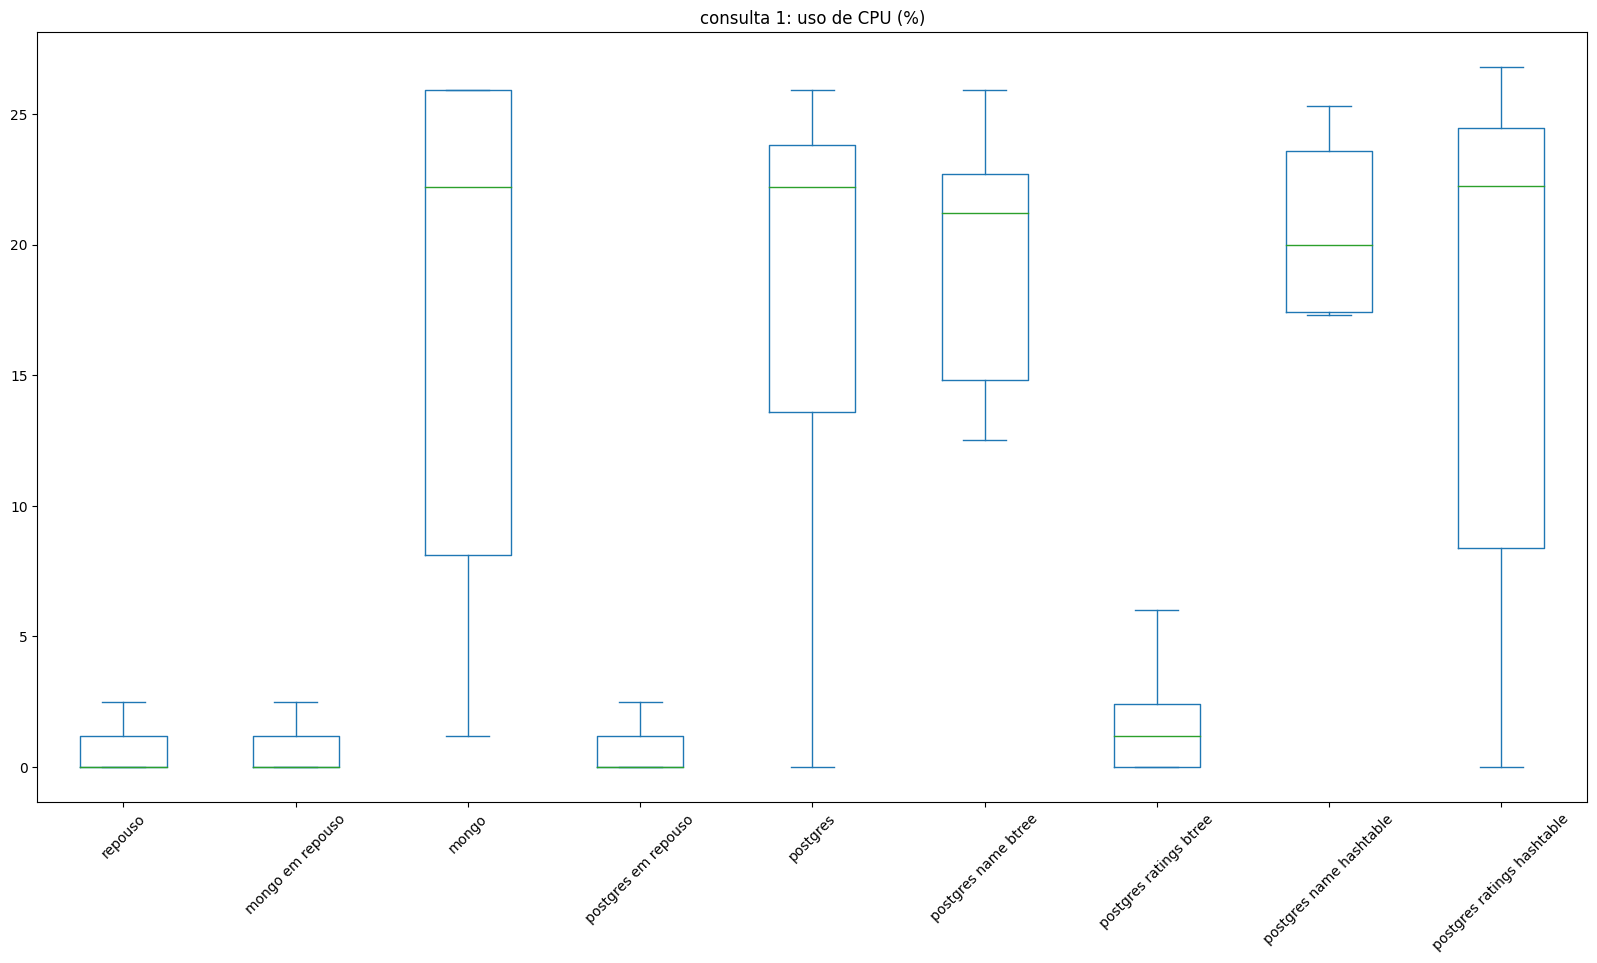

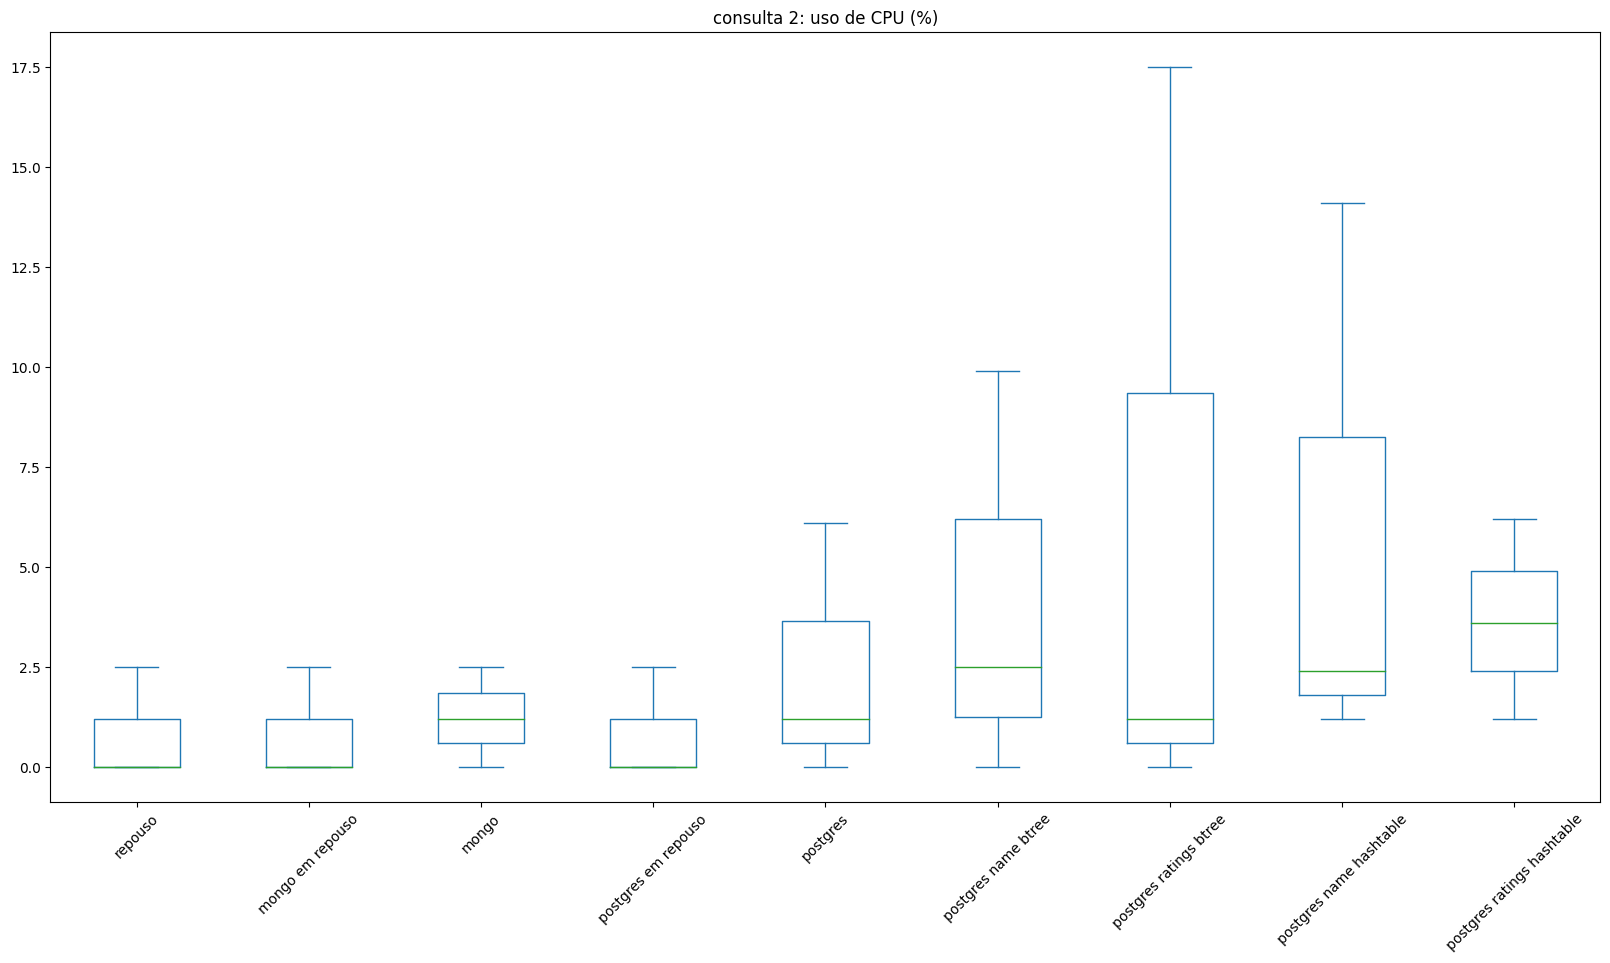

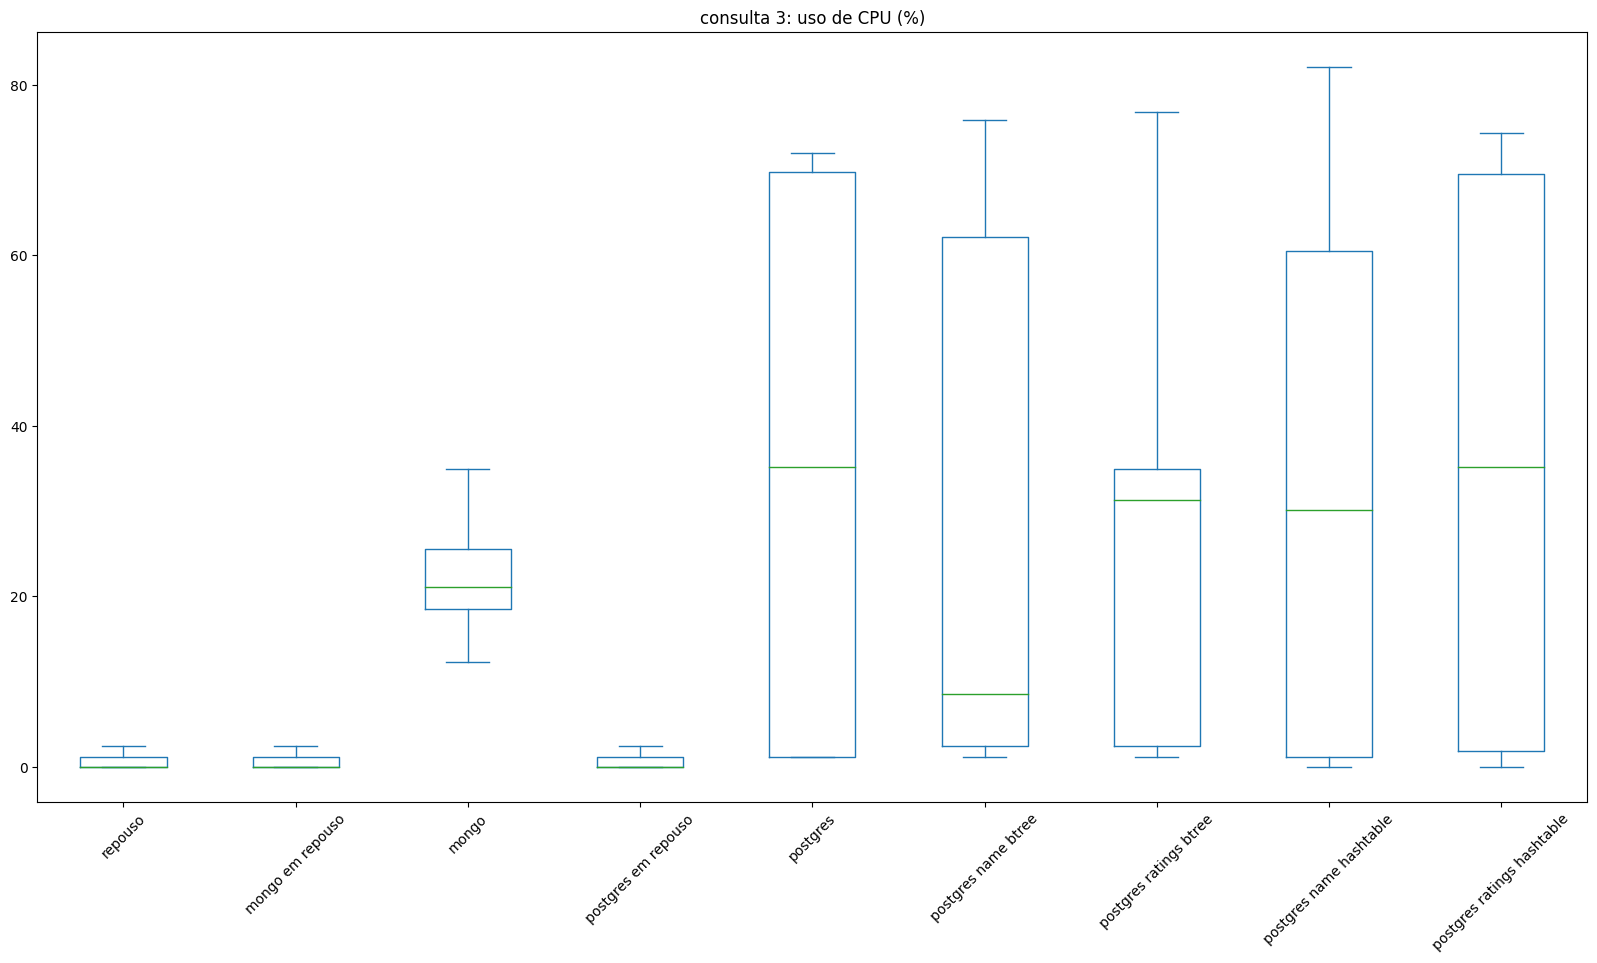

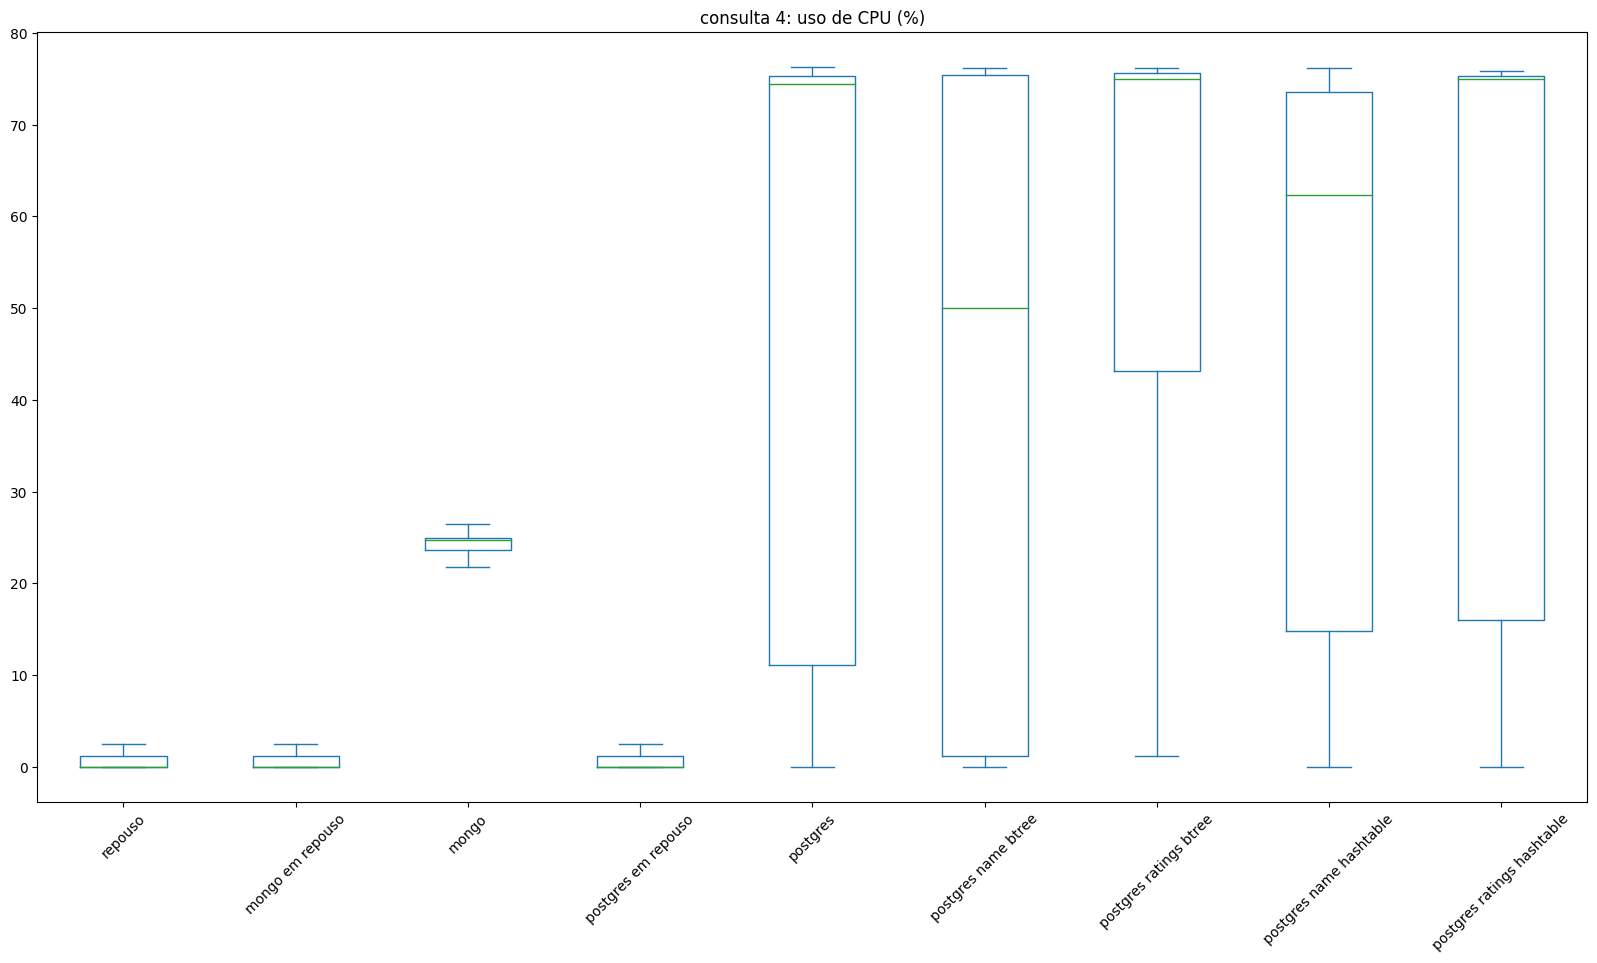

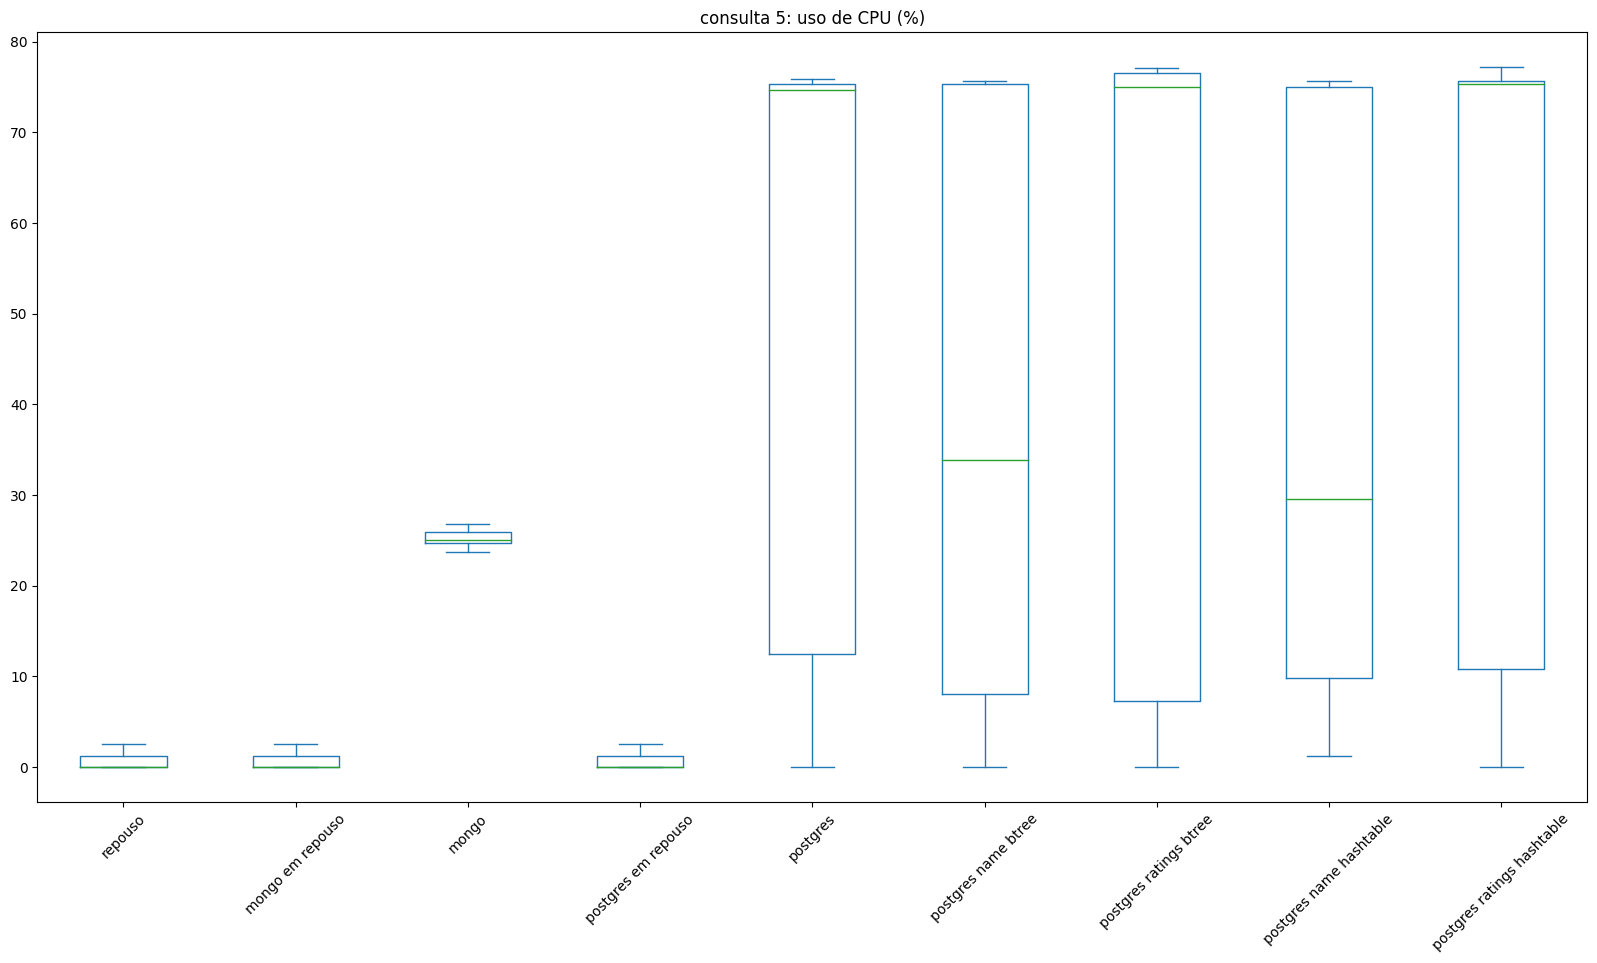

In [9]:
for i, consulta in enumerate(uso_da_maquina):
    uso_da_maquina[i]['usage'].plot.box(figsize=(20,10), showfliers=False)
    plt.xticks(rotation=45)
    plt.title(f'consulta {i}: uso de CPU (%)')
    plt.show()

In [14]:
uso_da_maquina[i]['disk_wc']

,repouso,mongo em repouso,mongo,postgres em repouso,postgres,postgres name btree,postgres ratings btree,postgres name hashtable,postgres ratings hashtable
0,0.000000,0.0,0.0,0.0,0.0,4.946312,488.590079,0.000000,0.000000
1,0.000000,0.0,0.0,0.0,0.0,247.194015,444.982795,19.784360,301.600161
2,0.000000,0.0,0.0,0.0,0.0,0.000000,19.778459,0.000000,0.000000
3,0.000000,0.0,0.0,0.0,0.0,281.802174,14.833879,44.501847,296.612190
4,0.000000,0.0,0.0,0.0,0.0,0.000000,14.832550,9.873876,0.000000
...,...,...,...,...,...,...,...,...,...
14777,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14778,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14779,9.816818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14780,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


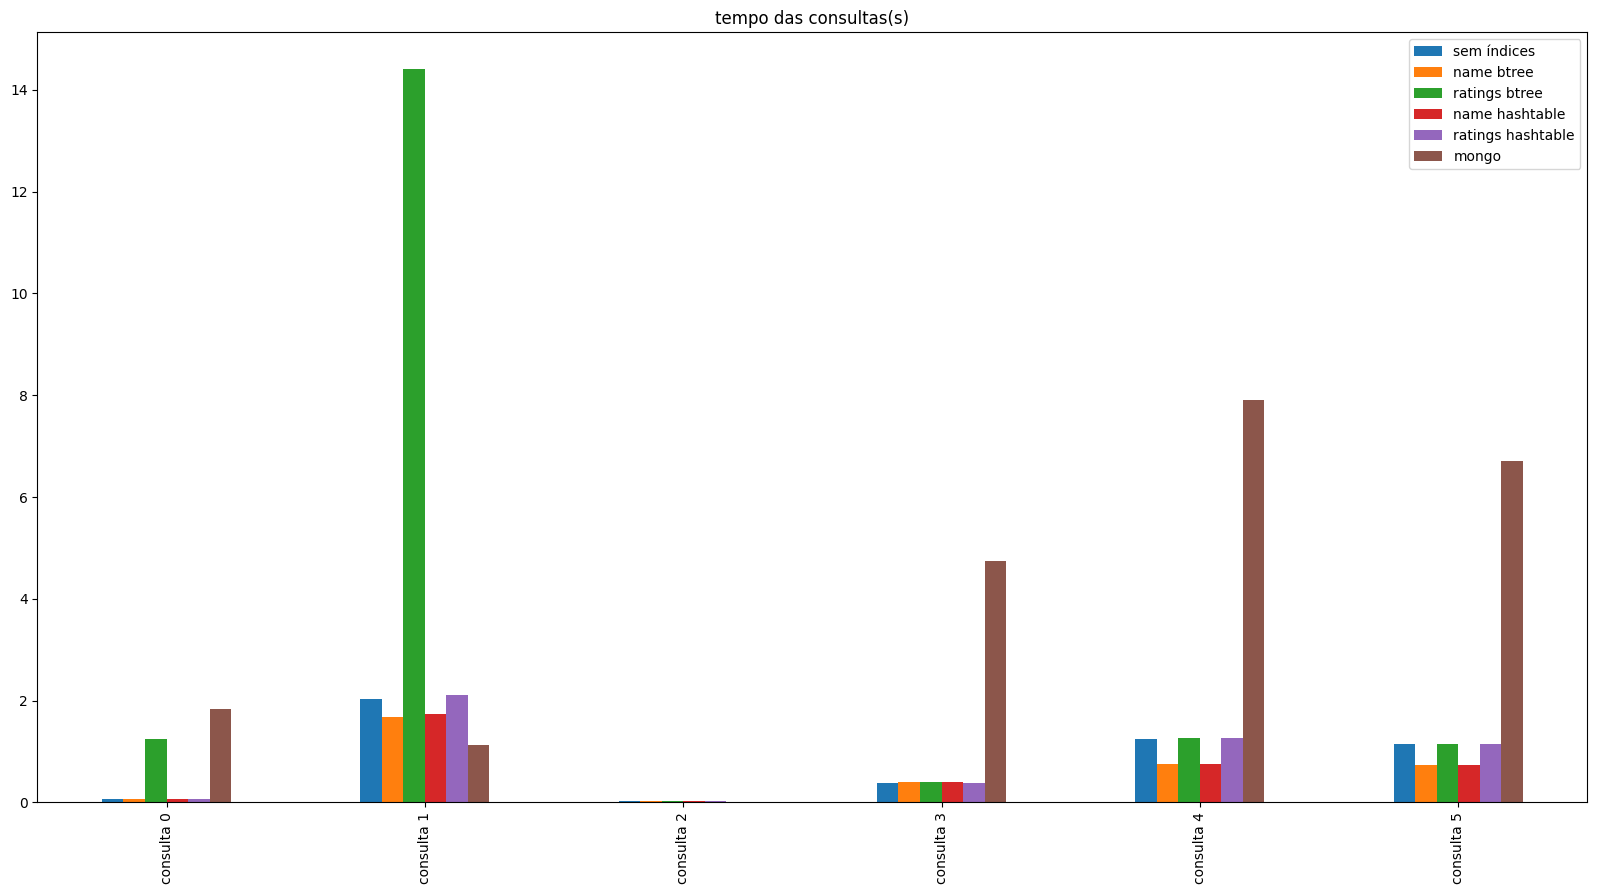

In [44]:
tempos_df = pd.DataFrame(duracoes_postgres).T
tempos_df.rename(columns={i: x for i, x in enumerate(['sem índices', 'name btree', 'ratings btree', 'name hashtable', 'ratings hashtable'])}, inplace=True)
tempos_df['mongo'] = duracao_mongo
tempos_df.rename({i: f'consulta {i}' for i in range(tempos_df.shape[0])}, inplace=True)
tempos_df.plot.bar(figsize=(20, 10), title='tempo das consultas(s)')
#plt.yscale('log')
plt.show()